# Pryngles module: orbit


In [1]:
from pryngles import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#@test:template
def test_orbody(self):

    S=Orbody(m=1)
    P=Orbody(parent=S,m=0.1,a=1,e=0.5)

    print(S.m,S.elements)
    print(P.m,P.elements)

    S.show_tree()

class Test(unittest.TestCase):pass
Test.test_orbody=test_orbody
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

.

1 {'m': 1}
0.1 {'m': 0.1, 'a': 1, 'e': 0.5}
└── <pryngles.orbit.Orbody object at 0x7f86d2dcb1f0>



----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [3]:
#@test:template
def test_Orbit(self):

    global S4

    #Quintuple system
    S1=Orbit(m1=1,m2=1,a=1,e=0.7,M=0)
    S2=Orbit(m1=1,m2=1,a=1,e=0,M=0)
    S3=Orbit(m1=S1,m2=S2,a=5,e=0)
    S4=Orbit(m1=S3,m2=1,a=20,e=0,E=45*Consts.deg)
    S4.calculate_orbit()
    print(S4.get_states())
    print(S4.Ps)

    #Using custom units
    #Quintuple system

    #Initialize positions
    units=['au','msun','yr']
    hn=Orbit(
        m1=1,
        m2=Orbit(m1=1e-3,m2=1e-7,a=0.5,e=0.0,units=units),
        units=units,
        a=20,e=0.0)
    hn.calculate_orbit()
    sim,states=hn.get_states()
    print(states)

    #SImple 

    #Use this code to animate:
    #Plot.animate_rebound(S4.sim)

class Test(unittest.TestCase):pass
Test.test_Orbit=test_Orbit
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

.

(<rebound.simulation.Simulation object at 0x7f86d2db17c0, N=5, t=0.0>, [{'m': 1.0, 'x': -5.47842712474619, 'y': -2.82842712474619, 'z': 0.0, 'vx': 0.07071067811865474, 'vy': -2.2011750966789583, 'vz': 0.0}, {'m': 1.0, 'x': -5.1784271247461895, 'y': -2.82842712474619, 'z': 0.0, 'vx': 0.07071067811865474, 'vy': 1.1653265494417333, 'vz': 0.0}, {'m': 1.0, 'x': -0.8284271247461903, 'y': -2.82842712474619, 'z': 0.0, 'vx': 0.07071067811865474, 'vy': -0.3306038638052443, 'vz': 0.0}, {'m': 1.0, 'x': 0.1715728752538097, 'y': -2.82842712474619, 'z': 0.0, 'vx': 0.07071067811865474, 'vy': 1.0836096985678507, 'vz': 0.0}, {'m': 1.0, 'x': 11.313708498984761, 'y': 11.31370849898476, 'z': 0.0, 'vx': -0.28284271247461895, 'vy': 0.282842712474619, 'vz': 0.0}])
[4.4428829381584665, 12.74284608459776, -112.2111774360127, 251.32741228718336]
[{'m': 1.0, 'x': -0.01998201598581259, 'y': 0.0, 'z': 0.0, 'vx': 0.0, 'vy': -0.0014043748232577592, 'vz': 0.0}, {'m': 0.001, 'x': 19.97996798901369, 'y': 0.0, 'z': 0.0, 


----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


<IPython.core.display.Javascript object>


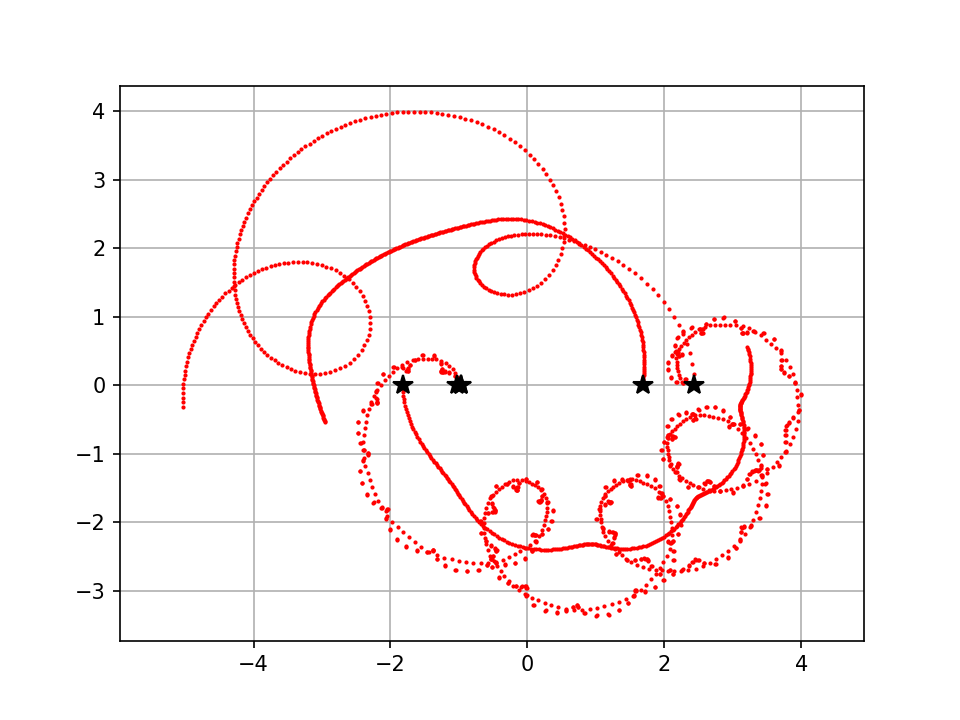

100%|██████████| 300/300 [00:00<00:00, 391.37it/s]
.
----------------------------------------------------------------------
Ran 1 test in 0.795s

OK


In [13]:
#@test:template
def test_build(self):

    global orbit
    
    units=['au','msun','yr']
    S1=Orbody(name="Star1",m=1)
    P1S1=Orbody(name="Planet1Star1",parent=S1,m=0.1,a=1,e=0.2)
    P2S1=Orbody(name="Planet2Star1",parent=S1,m=0.1,a=2,e=0.2)
    M1P1=Orbody(name="Moon1Planet1",parent=P1S1,m=0.01,a=0.1,e=0.5)
    SM1M1=Orbody(name="Submoon",parent=M1P1,m=0.001,a=0.01,e=0.2)

    S2=Orbody(name="Star1",m=1,a=5,e=0.3)
    P1S2=Orbody(name="Planet1Star2",parent=S2,m=0.1,a=1.5,e=0.5)

    orbital_tree=[[S1,[P1S1,[M1P1,SM1M1]]],[S2,P1S2]]
    orbit,pelements=OrbitUtil.build_system(orbital_tree,units)
    orbit.calculate_orbit()
    Plot.animate_rebound(orbit.sim,traces=True,nsnap=300,axis=True,ms=1)
    #Plot.animate_rebound(orbit.sim,filename="/tmp/hierarchical-system.gif",color='b',ms=3)

class Test(unittest.TestCase):pass
Test.test_build=test_build
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

In [10]:
#@end:module